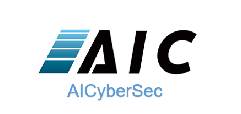

# Regular Expressions - mini-lesson

---

<a id="learning-objectives"></a>
### Learning Objectives
*After this lesson, you will be able to:*
- Define regular expressions.
- Use regular expressions to match text.
- Demonstrate how to use capturing and non-capturing groups.
- Use regex with python and pandas

In [74]:
# https://docs.python.org/3/howto/regex.html

In [75]:
from IPython.core.display import Image
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline

<a id="most-famous-quote-in-regex-dom"></a>
## The Most Famous Quote in `regex-dom`

>"Some people, when confronted with a problem, think 
'I know, I'll use regular expressions.'  Now they have two problems." — Jamie Zawinski (Netscape engineer)

<a id="so-what-does-a-regular-expression-look-like"></a>
## So, What Does a Regular Expression Look Like?

## ```/^([a-z0-9_\.-]+)@([\da-z\.-]+)\.([a-z\.]{2,6})$/```



<img src="assets/regex4.png">

<a id="the-history-of-regular-expressions"></a>
## The History of Regular Expressions

---
A regular expression is a **sequence of characters that define a search pattern**. Usually this pattern is then used by string searching algorithms for "find" or "find and replace" operations on strings.


Regular expressions and neural nets have a common ancestry in the work of McColloch and Pitts (1943) and their attempt to computationally represent a model of a neuron. 

This work was picked up by Steve Kleene (Mr. \*) and developed further into the idea of regular expressions. His idea was then popularized by its inclusion in Unix in the 1970s, in the form of [**grep**](http://opensourceforu.com/2012/06/beginners-guide-gnu-grep-basics-regular-expressions/) (grep stands for: Global regular expression print).  Its inclusion in PERL in the 1980s cemented its popularity.

Here's [the story of Walter Pitts](http://nautil.us/issue/21/information/the-man-who-tried-to-redeem-the-world-with-logic).

<a id="where-is-regex-implemented"></a>
## Where are `regex` Implemented?

---

There are any number of places where `regex`s can be run — from your text editor, to the `bash` shell, to `Python`, and even `SQL`. It is typically baked into the standard library of programming languages.



<a id="exploring-regex"></a>
## Exploring `regex`

---

The web app [RegExr](http://regexr.com/) is an excellent tool to explore `regex`. I recommend you to bookmark it.

For the rest of the lesson we are going to use it to test our patterns. Open [RegExr](http://regexr.com/) in a another tab.

#### Next: in the `Expression` subsection, delete everything.

You should see something like this: 

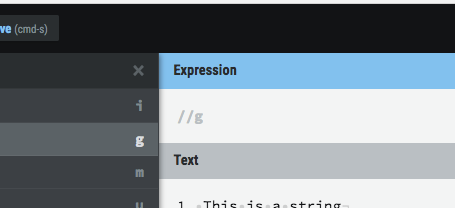

### Now copy the following text , into the `text` subsection of the RegExr website (linked above):

```
1. This is a string

2. That is also a string

3. This is an illusion

4. THIS IS LOUD

that isn't thus

bob this is bob
bob bob_ ralph_ bobbobbobbybobbob
ababababab

6. tHiS	iS	CoFu SEd

777. THIS IS 100%-THE-BEST!!!

8888. this_is_a_fiiile.py

hidden bob
```

You should now see something like this:

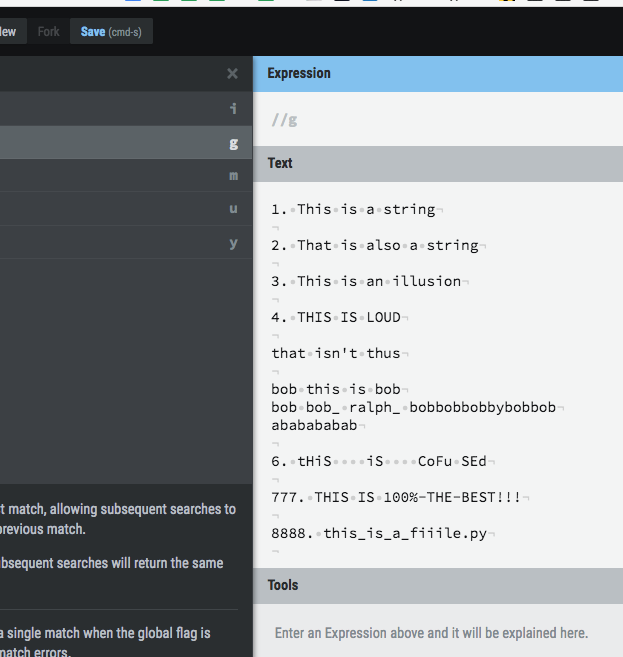

<br>

**Note:** Let's leave the explanation of `//g` aside for the moment.

<a id="basic-regular-expression-syntax"></a>
## Let's go through basic Regular Expression syntax
---
A regular expression is a powerful tool for matching text, based on a pre-defined pattern. It can detect the presence or absence of a text by matching with a particular pattern, and also can split a pattern into one or more sub-patterns.

<a id="literals"></a>
### Literals

Literals are essentially just what you think of as characters in a string. For example:

```
a
b
c
X
Y
Z
1
5
``` 

These are all considered literals.

_Enter: `T` in the Expression subsection_

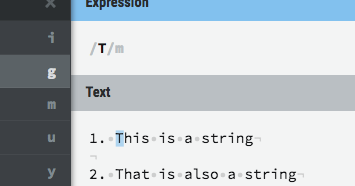

<a id="character-classes"></a>
### Character Classes `[ ]`

A character class is a set of characters matched as an "or."

```
[io]
```

So, this class would run as "match either i or o."

You can include as many characters as you like in between the brackets.

Character classes match only a single character.

<a id="character-classes-can-also-accept-certain-ranges"></a>
### Character Classes Can Also Accept Certain Ranges

For example, the following will all work:
    
```
[a-f]
[a-z]
[A-Z]
[a-zA-Z]
[1-4]
[a-c1-3]
```

_Enter: `[Ths]`  in the Expression subsection_

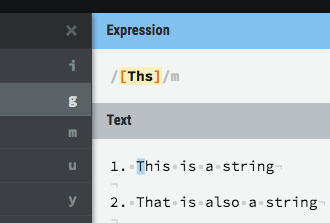
   


**Checkout: why only one character is highlighted?**

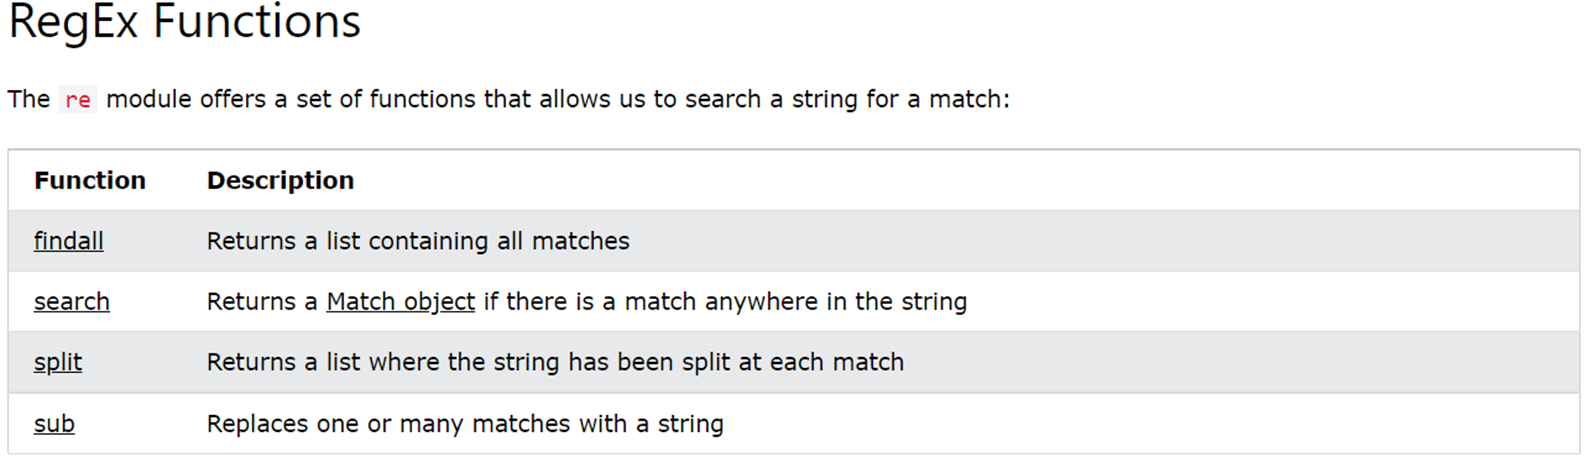

<a id="character-class-negation"></a>
### Character Class Negation

We can also add **negation** to character classes. For example:

```
[^a-z]
```

This means match *ANYTHING* that is *NOT* `a` through `z`.

In [76]:
# The findall() Function

import re

#The findall() function returns a list containing all matches.

txt = "The rain in Spain"
x = re.findall("ai", txt)
print(x)

['ai', 'ai']


In [77]:
# The search() Function

# The search() function searches the string for a match, and returns a Match object if there is a match.
# If there is more than one match, only the first occurrence of the match will be returned:

# There are six important white-space characters:
  #the word space, the nonbreaking space, the tab, the hard line break, the carriage return, and the hard page break

import re

txt = "The rain in Spain and France"

# txt = "only the first occurrence of the match will be returned"

x = re.search("\s", txt)

print("The first white-space character is located in position:", x.start())

The first white-space character is located in position: 3


In [78]:
# The split() Function

# The split() function returns a list where the string has been split at each match

import re

txt = "The rain in Spain"
x = re.split("\s", txt)
print(x)

['The', 'rain', 'in', 'Spain']


In [79]:
# You can control the number of occurrences by specifying the maxsplit parameter

import re

txt = "The rain in Spain"
x = re.split("\s", txt, 1)
print(x)

['The', 'rain in Spain']


In [80]:
# The sub() Function

# The sub() function replaces the matches with the text of your choice

import re

txt = "The rain in Spain . "
x = re.sub("\s","9", txt)
print(x)

The9rain9in9Spain9.9


In [81]:
# You can control the number of replacements by specifying the count parameter

# Replace the first 2 occurrences

# replace the space with 9, 2 only

import re

txt = "The rain in Spain. Hello Guys"
x = re.sub("\s", "9", txt, 2) # 2 number of spaces
print(x)

The9rain9in Spain. Hello Guys


In [82]:
# Match Object
# A Match Object is an object containing information about the search and the result

# Do a search that will return a Match Object

import re

txt = "The rain in Spain"
x = re.search("Spa", txt) # S start at 12 and ends at 14 (3 l3tters)
print(x) #this will print an object

<re.Match object; span=(12, 15), match='Spa'>


In [106]:
# Print the position (start- and end-position) of the first match occurrence.

# The regular expression looks for any words that starts with an upper case "S":
# last white-space and end of the word starting with S

import re

txt = "The rain France"
x = re.search(r"\bF\w+", txt)
print(x.span())
# print(x)

(9, 15)


In [109]:
print(x.string)

The rain France


In [85]:
# Print the part of the string where there was a match.

# The regular expression looks for any words that starts with an upper case "S":

print(x.group())

France


In [112]:
import re

# Here r character (r’portal’) stands for raw, not regex
  
  
match = re.search(r'l', 'GeeksforGeeks: A computer science \portals for geeks')
print(match)
print(match.group())
  
print('Start Index:', match.start())
print('End Index:', match.end())

<re.Match object; span=(40, 41), match='l'>
l
Start Index: 40
End Index: 41


In [114]:
# Character Classes

import re
  
  
print(re.findall(r'[Gg]eeks', 'GeeksforGeeks: \
                 A computer science portal for geeks')) # "G or g" beginning of each word

['Geeks', 'Geeks', 'geeks']


In [88]:
# Ranges

import re
  
  
print('Range',re.search(r'[a-zA-Z]', 'B'))

Range <re.Match object; span=(0, 1), match='B'>


In [118]:
# Negation

import re
  
print(re.search(r'[^a-g]', 'B')) #### try ^[a-g], 'u'

<re.Match object; span=(0, 1), match='B'>


In [122]:
import re
text = '''
Python is great.
Python is the fastest growing
major programming language in
the world.
Pythonistas thrive.'''

In [124]:
re.findall('^Python', text)
#[]

[]

In [123]:
re.findall('Python', text, re.MULTILINE)
#['Python', 'Python', 'Python']

['Python', 'Python', 'Python']

In [93]:
import re
re.sub('^Python', 'Code', 'Python is \nPython') # replace 'Python' by 'code' ... 'Code is \nPython'

'Code is \nPython'

In [94]:
re.sub('^Python', 'Code', 'Python is \nPython', flags=re.MULTILINE)

'Code is \nCode'

In [95]:
import re
text = '''
Coding is fun
Python is fun
Games are fun
Agreed?'''

In [96]:
re.findall('fun$', text)

[]

In [97]:
re.findall('fun$', text, flags=re.MULTILINE)

['fun', 'fun', 'fun']

In [98]:
# How to Match the Caret (^) or Dollar ($) Symbols in Regex?# 

# import re
# text = 'The product ^^^ costs $3 today.'
# re.findall('\^', text)
# ['^', '^', '^']
# re.findall('\$', text)

In [99]:
# Python Re End of String ($) Regex

import re
re.findall('fun$', 'PYTHON is fun')

['fun']

In [100]:
s = 'foo123bar daldlasd 12'
'12' in s

True

<a id="shorthand-for-character-classes"></a>
## Shorthand for Character Classes
---

```
\w - Matches word characters (includes digits and underscores)
\W - Matches what \w doesn't — non-word characters
\d - Matches all digit characters
\D - Matches all non-digit characters
\s - Matches whitespace (including tabs)
\S - Matches non-whitespace
\n - Matches new lines
\r - Matches carriage returns
\t - Matches tabs
```

These can also be placed into brackets like so:

```
[\d\t]
[^\d\t]
```

#### Go ahead and try those out with the same example

<a id="special-characters"></a>
## Special Characters
---

Certain characters must be escaped with a backslash: "`\`."

These include the following:

```
.
?
\
{
}
(
)
[
]
+
-
&
<
>
```

<a id="the-dot"></a>
## The Dot

---

The dot matches any single character.

<a id="anchors"></a>
## Anchors

---

Anchors are used to denote the start and end of a line.

```
^ - Matches the start of the line
$ - Matches the end of the line
```

Example:

```bash
^Now - Matches the word "Now" when it occurs at the beginning of a line.  
country$ - Matches the word "country" when it occurs at the end of a line.
```

### Using Regex with Python:

Run the following cell to load the `text` variable.

In [125]:
text = """1. This is a string

2. That is also a string

3. This is an illusion

4. THIS IS LOUD

that isn't thus

bob this is bob
bob bob_ ralph_ bobbobbobbybobbob
ababababab

6. tHiS    iS    CoFu SEd

777. THIS IS 100%-THE-BEST!!!

8888. this_is_a_fiiile .py

hidden bob"""

**With Python you can use regex in 2 different ways:**

First you need to install and import the regex module

**Note:** We are going to use the third-party regex module (that you get through PyPI), as it has an API compatible with the standard library re module (built-in with python), but offers additional functionality.

In [102]:
# !pip install regex

import re

Then either enter the regex straight in a `regex` class method:

In [103]:
re.findall('[Tt]h[^i][st]', text)

['That', 'that', 'thus']

or, use a regex compiler (cleaner):

In [104]:
pattern = re.compile(r'[Tt]h[^i][st]')
re.findall(pattern, text)

['That', 'that', 'thus']

Both  will return exactly the same output.

<a id="quantifiers"></a>
## Quantifiers

---

Quantfiers adjust how many items are matched.

```
* - Zero or more
+ - One or more
? - Zero or one
{n} - Exactly 'n' number
{n,} - Matches 'n' or more occurrences
{n,m} - Between 'n' and 'm'
```

In [105]:
import regex

url = 'https://stackoverflow.com/questions/tagged/regex'
pattern = regex.compile(r'(https?|ftp)://([^/\r\n]+)(/[^\r\n]*)?')
regex.findall(pattern, url)

ModuleNotFoundError: No module named 'regex'

<a id="alternation"></a>
## Alternation

---

The pipe character — `|` — can be used to denote an OR relation, just like in Python.

For example, `(bob|bab)` or `(b(o|a)b)`.

<a id="lookahead"></a>
## Lookahead
---

There are two types of lookaheads: postive and negative.

```    
(?=match_text) — A postive lookahead says, "only match the current pattern if it is followed by another pattern."
(?!match_text) — A negative lookahead says the opposite.

Examples:
- that(?=guy) — Only match "that" if it is followed by "guy."
- these(?!guys) — Only match "these" if it is NOT follow by "guys."
```

In [ ]:
text_ = 'that girl and that guy'
pattern = regex.compile(r'that(?=.guy)')
regex.findall(pattern, text_)

['that']

<a id="regex-in-python-and-pandas"></a>
## Regex in Python and `pandas`

---

Let's practice working with `regex` in Python and `pandas` using the string below.

In [ ]:
my_string = """
I said a hip hop,
The hippie, the hippie,
To the hip, hip hop, and you don't stop, a rock it
To the bang bang boogie, say, up jump the boogie,
To the rhythm of the boogie, the beat.
"""

You can find the documentation for this variable [here](https://www.youtube.com/watch?v=wLzwSqKNkVU) .

<a id="regex-findall-method"></a>
### `regex`' `.findall()` Method

In [ ]:
mo = re.findall('h[io]p', my_string)

In [ ]:
mo

['hip', 'hop', 'hip', 'hip', 'hip', 'hip', 'hop']

In [ ]:
# `.findall()` will return only the capture groups, if included.
mo = regex.findall('h([io])p', my_string)

In [ ]:
mo

['i', 'o', 'i', 'i', 'i', 'i', 'o']

<a id="using-pandas"></a>
### Using `pandas`

In [ ]:
fish = pd.Series(['onefish', 'twofish','redfish', 'bluefish'])
fish

0     onefish
1     twofish
2     redfish
3    bluefish
dtype: object

<a id="strcontains"></a>
### `str.contains`

In [ ]:
# Get all fish that start with "b."
fish[fish.str.contains('^b')]

3    bluefish
dtype: object

<a id="strextract"></a>
### `str.extract`

In [ ]:
# `.extract()` maps capture groups to new Series.
fish.str.extract('(.*)fish', expand=False)

0     one
1     two
2     red
3    blue
dtype: object

<a id="independent-practice"></a>
## Independent Practice
---

Pull up the following tutorials for regular expressions in Python. 

- [TutorialPoint](http://www.tutorialspoint.com/python/python_reg_expressions.htm)  
- [Google Regex Tutorial](https://developers.google.com/edu/python/regular-expressions) (findall)

In the cells below, import Python's `regex` library and experiment with matching on the string.

Try out some of the following:
- Match with and without case sensitivity.
- Match using word borders (try "bob").
- Use positive and negative lookaheads.
- Experiment with the multi-line flag.
- Try matching the second or third instance of a repetitive pattern ("ab" or "bob," for example).
- Try using `re.sub` to replace a matching string.
- Note the difference between `search` and `match`.
- What happens to the order of groups if they are nested?

In [ ]:
test = """
1. This is a string

2. That is also a string

3. This is an illusion

4. THIS IS LOUD

that isn't thus

bob this is bob
bob bob_ ralph_ bobbobbobbybobbob
ababababab

6. tHiS	iS	CoFu SEd

777. THIS IS 100%-THE-BEST!!!

8888. this_is_a_fiiile.py

hidden bob

"""

In [ ]:
string='GeeksforGeeks: A computer science \portals for geeks'
{str(i):str(string[i]) 
for i in range(len(string))}

{'0': 'G',
 '1': 'e',
 '2': 'e',
 '3': 'k',
 '4': 's',
 '5': 'f',
 '6': 'o',
 '7': 'r',
 '8': 'G',
 '9': 'e',
 '10': 'e',
 '11': 'k',
 '12': 's',
 '13': ':',
 '14': ' ',
 '15': 'A',
 '16': ' ',
 '17': 'c',
 '18': 'o',
 '19': 'm',
 '20': 'p',
 '21': 'u',
 '22': 't',
 '23': 'e',
 '24': 'r',
 '25': ' ',
 '26': 's',
 '27': 'c',
 '28': 'i',
 '29': 'e',
 '30': 'n',
 '31': 'c',
 '32': 'e',
 '33': ' ',
 '34': '\\',
 '35': 'p',
 '36': 'o',
 '37': 'r',
 '38': 't',
 '39': 'a',
 '40': 'l',
 '41': 's',
 '42': ' ',
 '43': 'f',
 '44': 'o',
 '45': 'r',
 '46': ' ',
 '47': 'g',
 '48': 'e',
 '49': 'e',
 '50': 'k',
 '51': 's'}

<a id="extra-practice"></a>
## Extra Practice

---

Pull up the [Regex Golf](http://regex.alf.nu/) website and solve as many as you can!

If you get bored, try [Regex Crossword](https://regexcrossword.com/).